In [1]:
#!pip install matplotlib
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("covtype.data",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [4]:
for i in range(1,5):
    print("Wilderness_Area{}".format(i))

Wilderness_Area1
Wilderness_Area2
Wilderness_Area3
Wilderness_Area4


In [5]:
wilderness_area = ["Wilderness_Area{}".format(i) for i in range(1,5)] 
wilderness_area

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4']

In [6]:
soil_type = ["Soil_Type{}".format(i) for i in range(1,41)]
soil_type

['Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [7]:
cols = ["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways",
       "Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points",wilderness_area,soil_type,"Cover_Type"]
cols

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 ['Wilderness_Area1',
  'Wilderness_Area2',
  'Wilderness_Area3',
  'Wilderness_Area4'],
 ['Soil_Type1',
  'Soil_Type2',
  'Soil_Type3',
  'Soil_Type4',
  'Soil_Type5',
  'Soil_Type6',
  'Soil_Type7',
  'Soil_Type8',
  'Soil_Type9',
  'Soil_Type10',
  'Soil_Type11',
  'Soil_Type12',
  'Soil_Type13',
  'Soil_Type14',
  'Soil_Type15',
  'Soil_Type16',
  'Soil_Type17',
  'Soil_Type18',
  'Soil_Type19',
  'Soil_Type20',
  'Soil_Type21',
  'Soil_Type22',
  'Soil_Type23',
  'Soil_Type24',
  'Soil_Type25',
  'Soil_Type26',
  'Soil_Type27',
  'Soil_Type28',
  'Soil_Type29',
  'Soil_Type30',
  'Soil_Type31',
  'Soil_Type32',
  'Soil_Type33',
  'Soil_Type34',
  'Soil_Type35',
  'Soil_Type36',
  'Soil_Type37',
  'Soil_Type38',
  'Soil_Type39',
  'Soil_Type40'],
 '

In [8]:
col_names = []
for i in cols:
    if type(i) == list:
        for j in i:
            col_names.append(j)
    else:
        col_names.append(i)

col_names

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

In [9]:
data.to_csv("data_with_header.csv",header=col_names ,index=False)

In [10]:
df = pd.read_csv("data_with_header.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [11]:
df.shape

(581012, 55)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [13]:
df.shape

(581012, 55)

In [14]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


There are no missing values

In [15]:
categorical_cols = [i for i in df.columns if len(df[i].unique()) <= 2]
categorical_cols        

['Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [16]:
discreet_cols = [i for i in df.columns if len(df[i].unique()) > 2 and i!='Cover_Type']
discreet_cols

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [17]:
df['Cover_Type'].value_counts().sort_values(ascending=False)

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [18]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [19]:
df['Soil_Type7'].value_counts()

0    580907
1       105
Name: Soil_Type7, dtype: int64

In [20]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [21]:
df[discreet_cols]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837
581008,2391,152,19,67,12,95,240,237,119,845
581009,2386,159,17,60,7,90,236,241,130,854
581010,2384,170,15,60,5,90,230,245,143,864


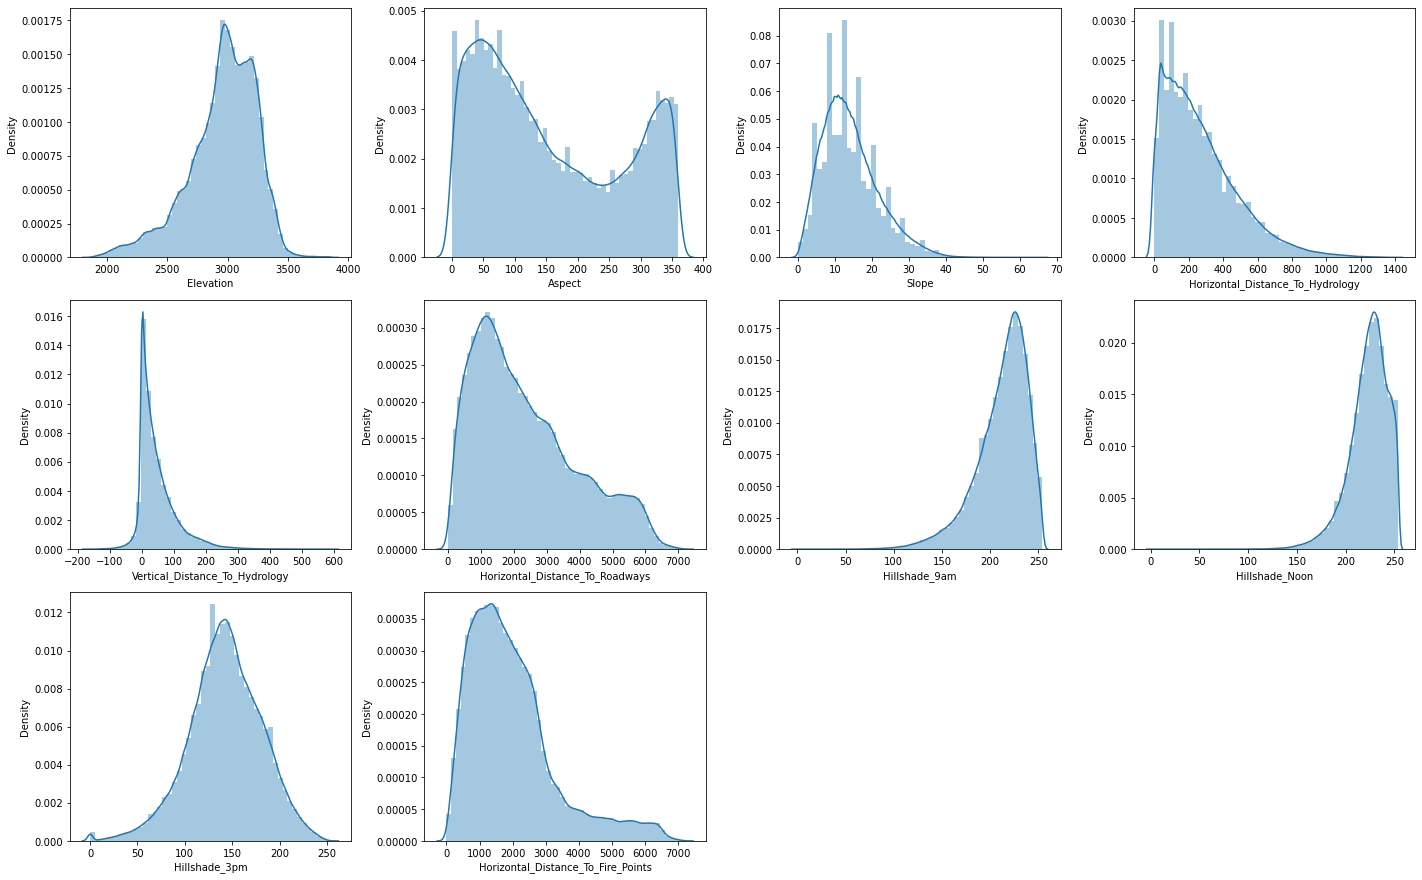

In [22]:
plt.figure(figsize=(20,20),facecolor='white')
number=1
for i in discreet_cols:
    if number <= 10:
        ax = plt.subplot(5,4,number)
        sns.distplot(df[i])
    number+=1
plt.tight_layout()

There are lot of skewness in the data, hence reqired scaling 

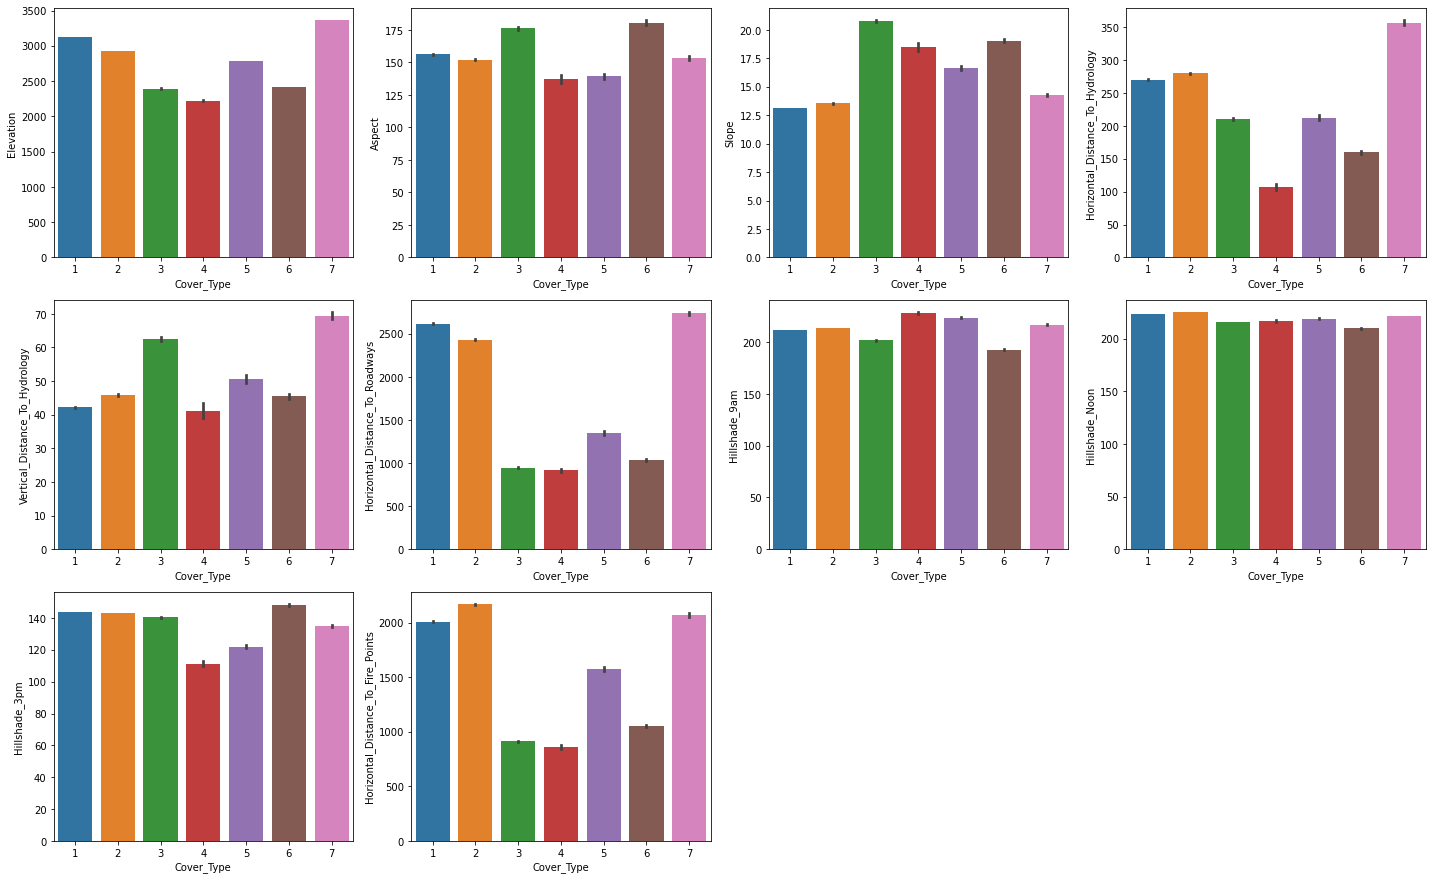

In [23]:
## Relationship between target variable and discreet columns
plt.figure(figsize=(20,20),facecolor='white')
number = 1
for i in discreet_cols:
    if number <= 10:
        ax = plt.subplot(5,4,number)
        sns.barplot(df['Cover_Type'],df[i])
    number+=1
plt.tight_layout()

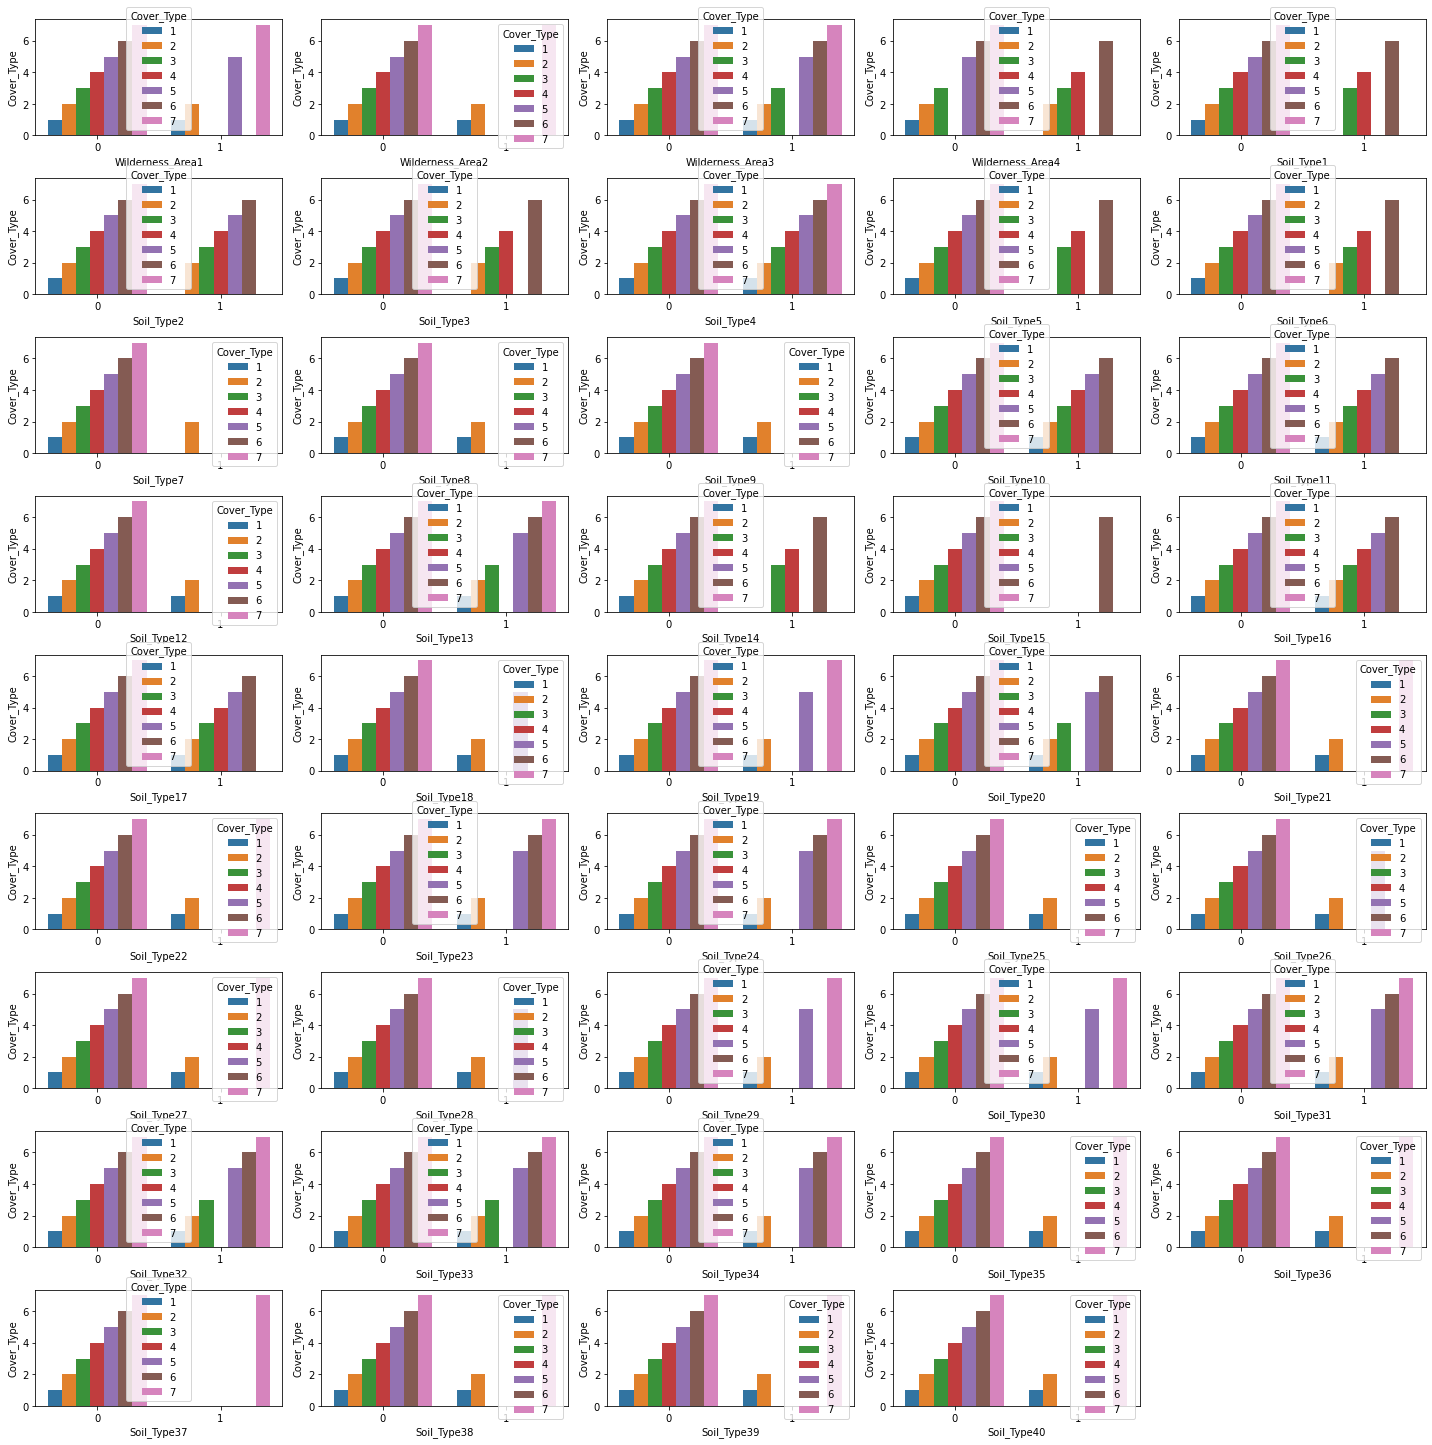

In [24]:
## relationship between categorical columns and target variable
plt.figure(figsize=(20,20),facecolor='white')
number=1
for i in categorical_cols:
    if number<50:
        ax= plt.subplot(9,5,number)
        sns.barplot(df[i],df['Cover_Type'],hue=df['Cover_Type'])
    number+=1
plt.tight_layout()

<AxesSubplot:>

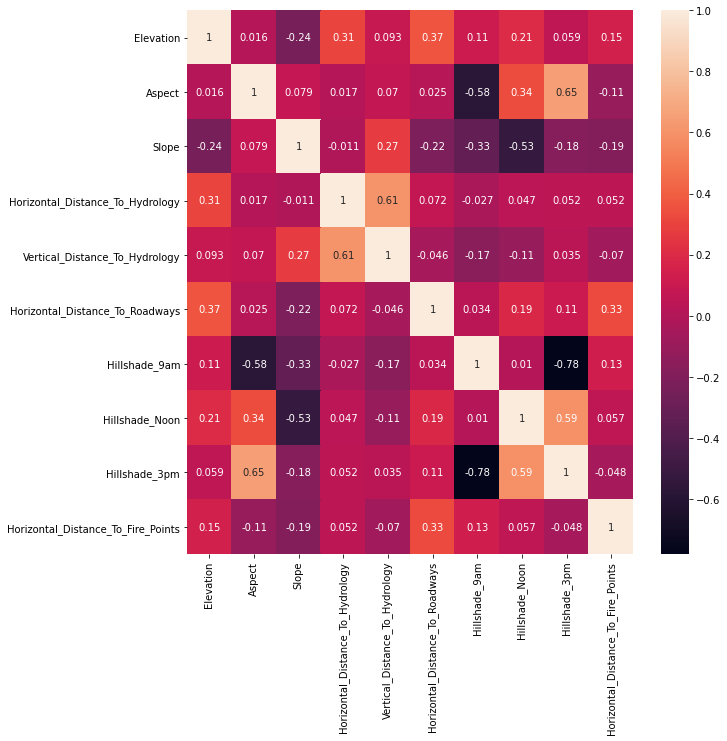

In [25]:
## to find correlation among discreet columns

plt.figure(figsize=(10,10))
corr = df[discreet_cols].corr()
heatmap = sns.heatmap(corr,annot=True)
heatmap

Need to find the vif score

<AxesSubplot:>

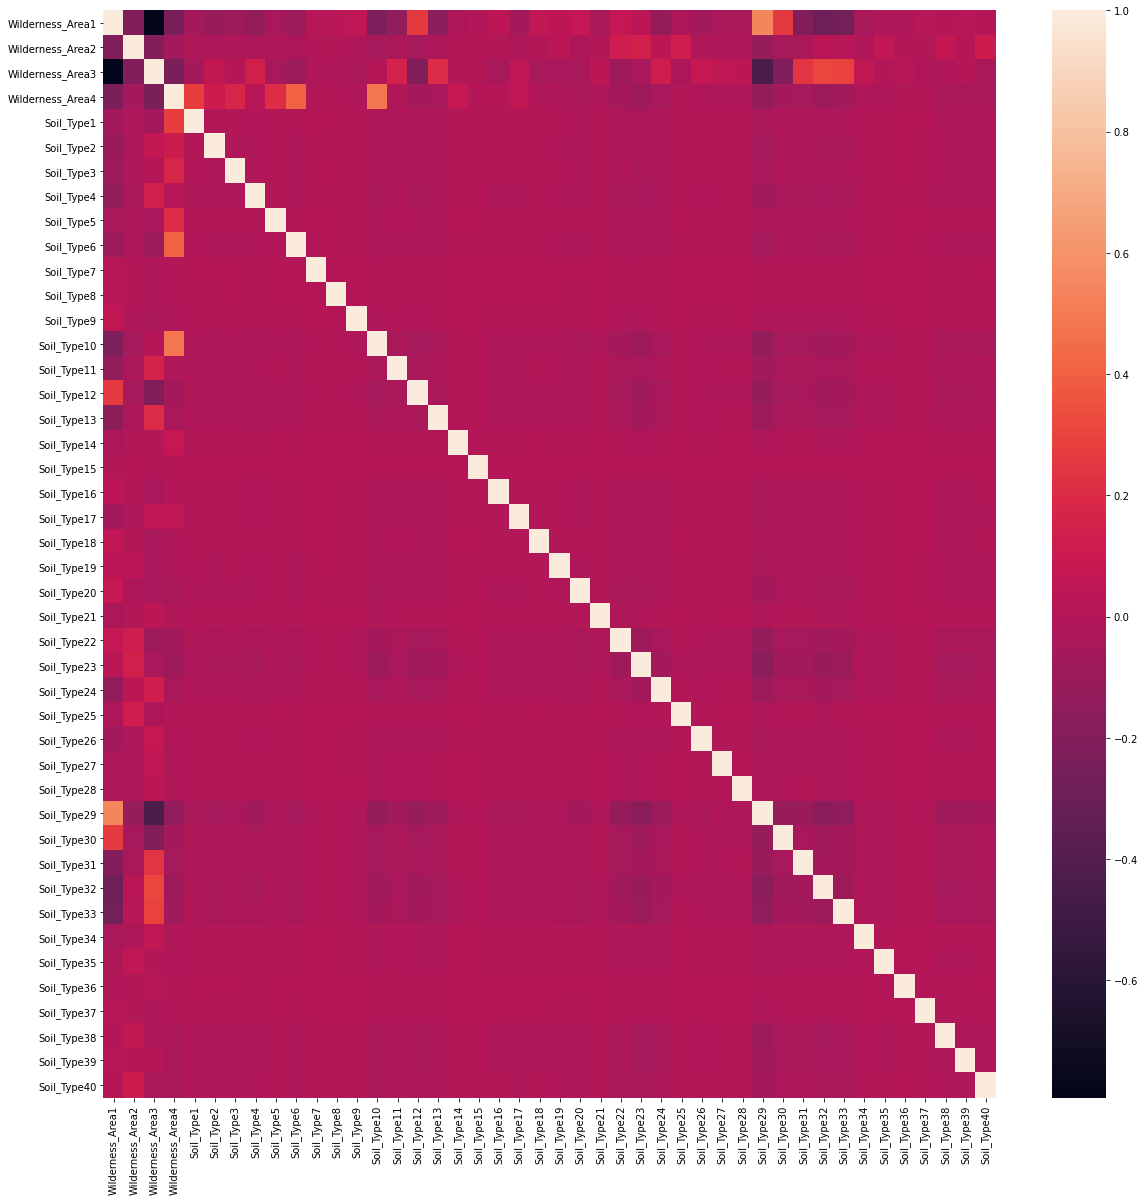

In [27]:
## to find correlation among categorical columns
plt.figure(figsize=(20,20))
corr = df[categorical_cols].corr()
heatmap = sns.heatmap(corr)
heatmap

<AxesSubplot:>

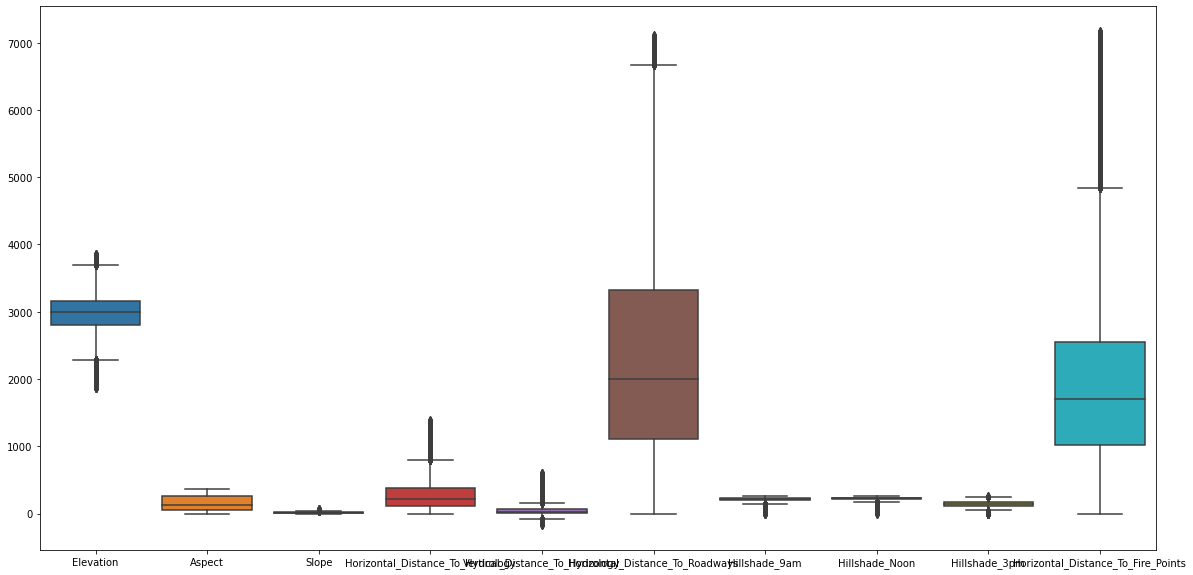

In [28]:
fig ,ax  = plt.subplots(figsize = (20,10))
sns.boxplot(data = df[discreet_cols])

More outliers in Horizontal_Distance_To_Fire_Points and Horizontal_Distance_To_Roadways

In [25]:
### Removing outliers

In [26]:
q = df['Horizontal_Distance_To_Fire_Points'].quantile(.94)
df_new = df[df['Horizontal_Distance_To_Fire_Points'] < q]

In [27]:
df_new.shape

(546145, 55)

In [28]:
q = df['Horizontal_Distance_To_Roadways'].quantile(.98)
df_new = df_new[df_new['Horizontal_Distance_To_Roadways'] < q]

In [29]:
df_new.shape

(535650, 55)

<AxesSubplot:>

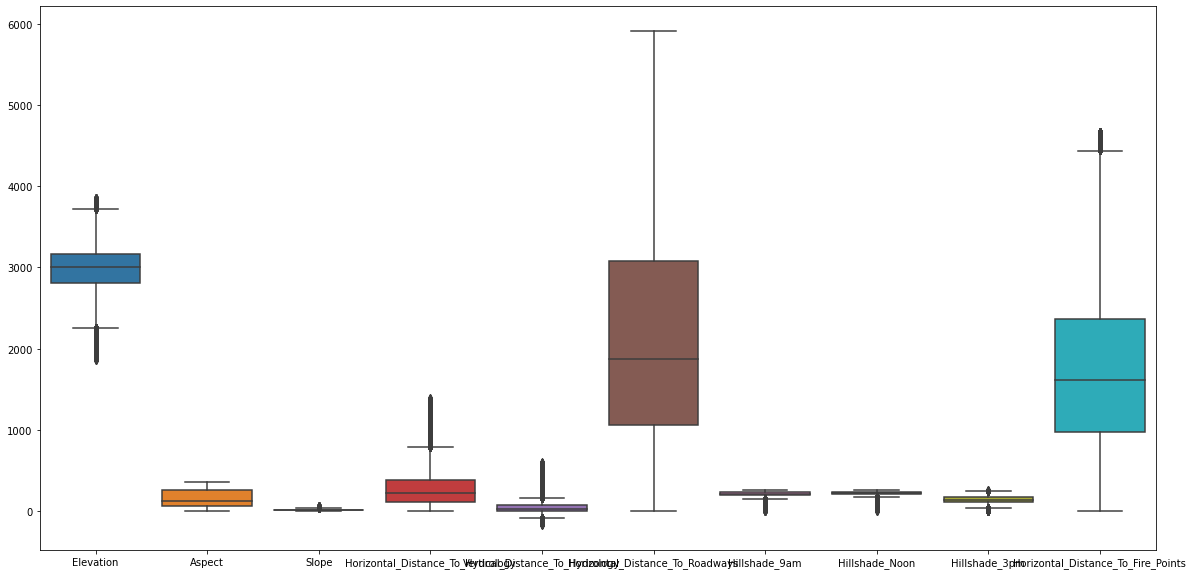

In [30]:
fig ,ax  = plt.subplots(figsize = (20,10))
sns.boxplot(data=df_new[discreet_cols])

In [31]:
## Splitting X and y columns

y = df_new['Cover_Type']
X = df_new.drop(['Cover_Type'],axis=1)
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
11,2886,151,11,371,26,5253,234,240,136,4051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21,2880,209,17,216,30,4986,206,253,179,4323,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
35,2900,45,19,242,20,5199,221,195,100,4115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
61,2952,107,11,42,7,5845,239,226,116,3509,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
67,2919,13,13,90,6,5321,207,214,142,4060,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [32]:
## transferring to a csv file
X.to_csv('X_data.csv',index=False)
y.to_csv('y_data.csv',index=False)

In [33]:
X.shape

(535650, 54)

In [34]:
## standard scaling

In [35]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [36]:
X_scaled_df = pd.DataFrame(scalar.fit_transform(X[discreet_cols]),columns=discreet_cols)
X_scaled_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-0.255863,-0.050113,-0.450802,0.485751,-0.357028,2.123645,0.817009,0.850607,-0.162177,2.388691
1,-0.276768,0.466156,0.345845,-0.245300,-0.289613,1.938350,-0.212660,1.497372,0.943137,2.669615
2,-0.207085,-0.993640,0.611394,-0.122672,-0.458151,2.086170,0.338949,-1.388197,-1.087556,2.454791
3,-0.025912,-0.441766,-0.450802,-1.065964,-0.677250,2.534485,1.000879,0.154090,-0.676277,1.828910
4,-0.140887,-1.278478,-0.185253,-0.839574,-0.694104,2.170836,-0.175886,-0.442925,-0.007947,2.397986


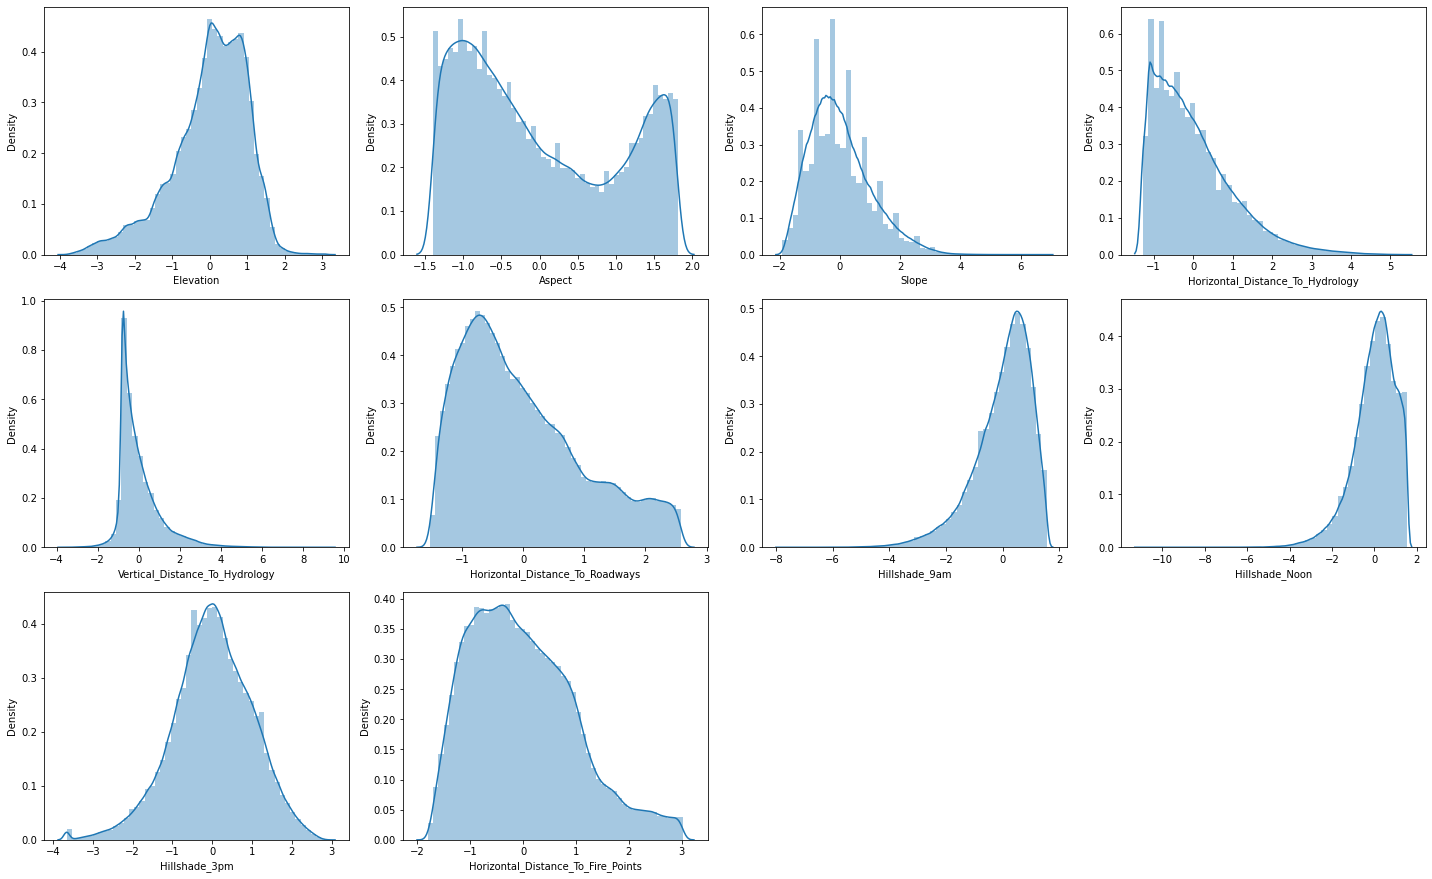

In [37]:
plt.figure(figsize=(20,20),facecolor='white')
number=1
for i in discreet_cols:
    if number <= 10:
        ax = plt.subplot(5,4,number)
        sns.distplot(X_scaled_df[i])
    number+=1
plt.tight_layout()

In [38]:
variables = X_scaled
variables.shape

(535650, 54)

In [39]:
vif = pd.DataFrame()

In [40]:
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

In [41]:
vif['Features'] = X.columns

In [43]:
vif[0:9]

,VIF,Features
0,4.790485,Elevation
1,1.903877,Aspect
2,7.558241,Slope
3,1.932658,Horizontal_Distance_To_Hydrology
4,1.934024,Vertical_Distance_To_Hydrology
5,1.598917,Horizontal_Distance_To_Roadways
6,108.157163,Hillshade_9am
7,40.454759,Hillshade_Noon
8,149.441381,Hillshade_3pm


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=1)

In [35]:
log_reg = LogisticRegression(verbose=1)

In [52]:
log_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\VIMALA P T\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.1s finished


LogisticRegression(verbose=1)

In [53]:
X_test[0]

array([ 1.96107223e-03,  1.80133511e+00,  8.02957697e-02, -9.81067462e-01,
       -4.58150744e-01, -5.06566736e-01, -5.80398763e-01, -5.92178112e-01,
        2.23397347e-01, -1.32115261e+00, -8.26262017e-01, -2.34826831e-01,
        1.05553397e+00, -2.72270840e-01, -7.54370403e-02, -1.19367168e-01,
       -9.53195819e-02, -1.53916261e-01, -5.46840005e-02, -1.11478023e-01,
       -6.55288713e-03, -1.30351801e-02, -4.63240621e-02, -2.54708979e-01,
       -1.54005213e-01, -1.97503525e-01, -1.83402177e-01, -3.34592207e-02,
       -2.36658054e-03, -5.77583274e-02, -8.01846325e-02, -4.44236034e-02,
       -8.13670693e-02, -1.07024640e-01, -3.95841604e-02, -2.45860492e-01,
        2.90318202e+00, -1.96644780e-01, -2.97291060e-02, -6.96911403e-02,
       -4.50728540e-02, -4.20618966e-02, -4.66475555e-01, -2.25235193e-01,
       -2.24336954e-01, -3.29499814e-01, -3.03410342e-01, -5.49238893e-02,
       -5.95214029e-02, -1.49066884e-02, -2.35932852e-02, -1.70728293e-01,
       -1.61354955e-01, -

In [63]:
log_reg.predict_proba([X_test[0]])

array([[6.08828502e-01, 3.44745520e-01, 2.65736499e-05, 6.15336029e-07,
        4.54519936e-02, 2.31822337e-04, 7.14973002e-04]])

In [64]:
log_reg.predict([X_test[0]])

array([1], dtype=int64)

In [68]:
y_test.iloc[0]

2

In [69]:
log_reg

LogisticRegression(verbose=1)

In [70]:
y_pred = log_reg.predict(X_test)

In [83]:
y_pred

array([1, 2, 1, ..., 2, 1, 3], dtype=int64)

In [87]:
len(y_pred)

107130

In [86]:
np.array(y_test)

array([2, 1, 7, ..., 2, 1, 3], dtype=int64)

In [88]:
len(np.array(y_test))

107130

In [114]:
multilabel_confusion_matrix(y_test,y_pred,labels=[1,2,3,4,5,6,7])

array([[[ 55933,  11299],
        [ 11257,  28641]],

       [[ 43350,  13701],
        [ 10685,  39394]],

       [[ 97090,   2819],
        [  1357,   5864]],

       [[106452,    144],
        [   321,    213]],

       [[105282,     49],
        [  1787,     12]],

       [[102765,    877],
        [  2614,    874]],

       [[102163,    856],
        [  1724,   2387]]], dtype=int64)

In [100]:
accuracy_score(y_test,y_pred)

0.7223466816017922

In [101]:
class_data = classification_report(y_test,y_pred)
class_data

'              precision    recall  f1-score   support\n\n           1       0.72      0.72      0.72     39898\n           2       0.74      0.79      0.76     50079\n           3       0.68      0.81      0.74      7221\n           4       0.60      0.40      0.48       534\n           5       0.20      0.01      0.01      1799\n           6       0.50      0.25      0.33      3488\n           7       0.74      0.58      0.65      4111\n\n    accuracy                           0.72    107130\n   macro avg       0.59      0.51      0.53    107130\nweighted avg       0.71      0.72      0.71    107130\n'

In [102]:
log_reg_proba = log_reg.predict_proba(X_test)
log_reg_proba

array([[6.08828502e-01, 3.44745520e-01, 2.65736499e-05, ...,
        4.54519936e-02, 2.31822337e-04, 7.14973002e-04],
       [3.09136106e-01, 6.82520619e-01, 3.23400752e-04, ...,
        6.52200664e-03, 7.85548943e-04, 7.11370375e-04],
       [5.64929226e-01, 3.53409268e-03, 7.96818512e-08, ...,
        3.02230711e-06, 2.87335955e-07, 4.31533291e-01],
       ...,
       [4.95853663e-01, 4.96650423e-01, 1.80229847e-07, ...,
        1.59101615e-06, 4.79550492e-08, 7.49408975e-03],
       [9.12536295e-01, 6.06391308e-02, 4.80844840e-08, ...,
        2.18075751e-07, 1.75228933e-07, 2.68241295e-02],
       [2.91339811e-12, 2.75342653e-02, 7.17750031e-01, ...,
        9.41666962e-12, 7.36536526e-02, 2.40960392e-14]])

In [105]:
log_reg_proba_onecol = log_reg_proba[:,1]
len(log_reg_proba_onecol)

107130

In [117]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 1,
 'warm_start': False}

In [45]:
### Hyperparameter tuning

In [44]:
param_grid = {'penalty':['l1','l2','elasticnet'],
             'C': np.logspace(-2,2,20),
             'solver':['newton-cg','liblinear','lbfgs','sag','saga']}

In [131]:
log_reg_rscv = RandomizedSearchCV(log_reg,param_grid,cv=5,n_jobs=-1,verbose=1)
log_reg_rscv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(verbose=1), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'liblinear',
                                                   'lbfgs', 'sag', 'saga']},
                   verbose=1)

In [132]:
log_reg_rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 68.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 31.8min finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(verbose=1), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'liblinear',
                                                   'lbfgs', 'sag', 'saga']},
                   verbose=1)

In [133]:
log_reg_rscv.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.23357214690901212}

In [35]:
log_reg_rs = LogisticRegression(solver='newton-cg',penalty='none',C=0.23357214690901212)

In [36]:
log_reg_rs.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, penalty='none', solver='newton-cg')

In [37]:
y_p1 = log_reg_rs.predict(X_test)

In [38]:
accuracy_score(y_test,y_p1)

0.722878745449454